In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [4]:
data = sns.load_dataset("iris")
data.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [5]:
#Prepare the training set

# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]
print(X.shape)

# y = target values, last column of the data frame
y = data.iloc[:, -1]
print(y.shape)

(150, 4)
(150,)


In [6]:
data["species"].value_counts()
#balanced dataset

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

C:\Users\kirti\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


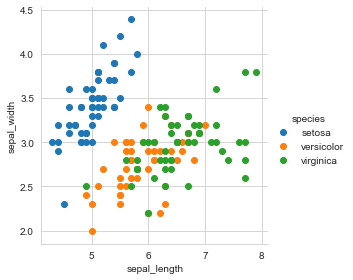

In [7]:
sns.set_style("whitegrid");
sns.FacetGrid(data,hue="species",size=4) \
    .map(plt.scatter,"sepal_length","sepal_width") \
    .add_legend();
plt.show();

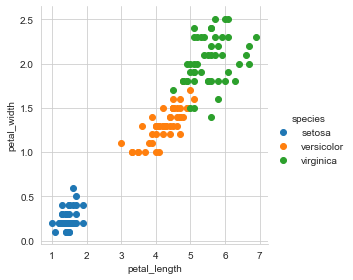

In [8]:
sns.set_style("whitegrid");
sns.FacetGrid(data,hue="species",size=4) \
    .map(plt.scatter,"petal_length","petal_width") \
    .add_legend();
plt.show();

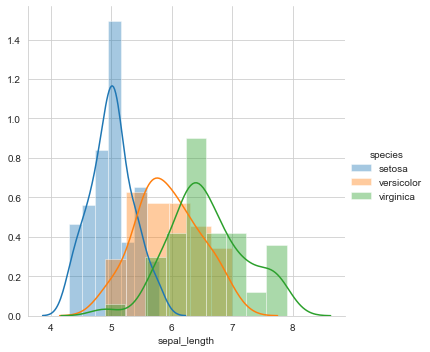

In [9]:
sns.FacetGrid(data,hue="species",size=5)\
    .map(sns.distplot,"sepal_length")\
    .add_legend()
plt.show()

C:\Users\kirti\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


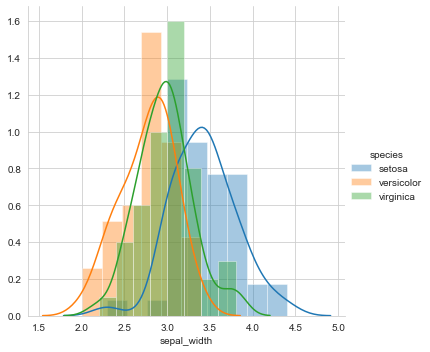

In [77]:
sns.FacetGrid(data,hue="species",size=5)\
    .map(sns.distplot,"sepal_width")\
    .add_legend()
plt.show()

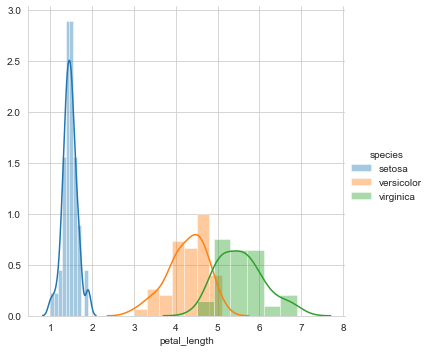

In [10]:
sns.FacetGrid(data,hue="species",size=5)\
    .map(sns.distplot,"petal_length")\
    .add_legend()
plt.show()

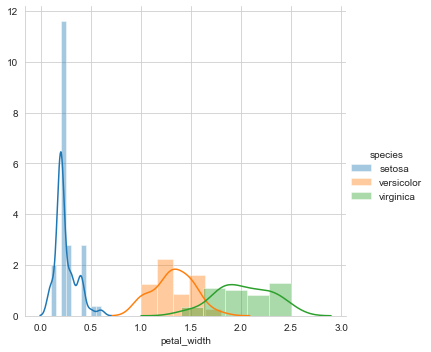

In [78]:
sns.FacetGrid(data,hue="species",size=5)\
    .map(sns.distplot,"petal_width")\
    .add_legend()
plt.show()

In [123]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

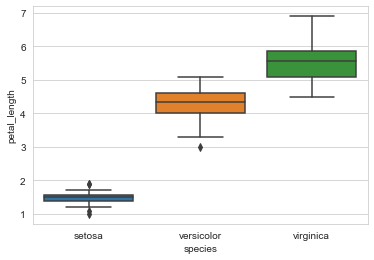

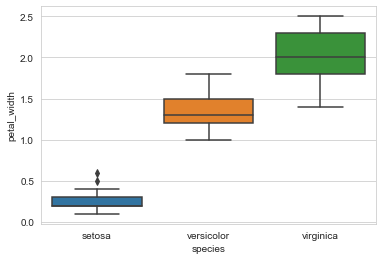

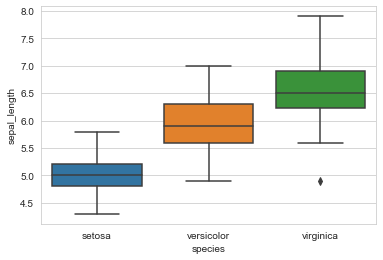

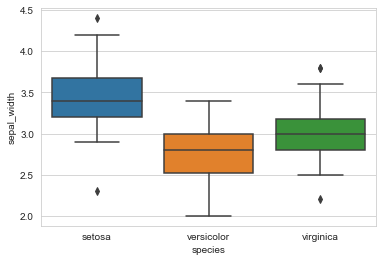

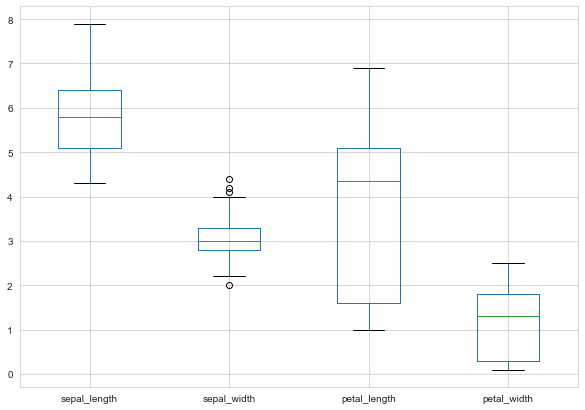

In [124]:
sns.boxplot(x='species',y='petal_length',data=data)
plt.show()
sns.boxplot(x='species',y='petal_width',data=data)
plt.show()
sns.boxplot(x='species',y='sepal_length',data=data)
plt.show()
sns.boxplot(x='species',y='sepal_width',data=data)
plt.show()
new_data=data[["sepal_length","sepal_width","petal_length","petal_width"]]
plt.figure(figsize=(10,7))
new_data.boxplot()

#if petal length is less than 5 and greater than 2 then it is versicolor 
# if peltal length is greater than 5 it is virginica, there are 25 percentage of 
#petal length with length less than 5
#25 percent error because of overlap between both the virginica and the versicolor 
# whiskers min and max
#if petal length is less than 2 than it is setosa

In [125]:
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model

C:\Users\kirti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kirti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [274]:
predictions = model.predict(x_test)
print(predictions.shape)# printing predictions
#kfold=KFold(n_splits=5,random_state=42)
#print("Kfold",kfold)
predicted=cross_val_score(model,x_train,y_train,cv=5)
print(predicted)
predicted_mean=predicted.mean()
print("Predicted mean",predicted_mean)
print(classification_report(y_test,predictions))
print("Accuracy score",accuracy_score(y_test,predictions))


(30,)
[0.92       0.95833333 0.91666667 0.95833333 1.        ]
Predicted mean 0.9506666666666668
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy score 1.0


C:\Users\kirti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kirti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\kirti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kirti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\kirti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

In [267]:
from sklearn.naive_bayes import GaussianNB
gnb_model=GaussianNB(priors=None)
gnb_model.fit(x_train,y_train)
predgnb=gnb_model.predict(x_test)
#kfold=KFold(n_splits=5,random_state=42)
#print("Kfold",kfold)
predicted=cross_val_score(gnb_model,x_train,y_train,cv=5)
print(predicted)
predicted_mean=predicted.mean()
print(predicted_mean)
print(classification_report(y_test,predgnb))
print(accuracy_score(y_test,predgnb))
index1 = 0
misclassifiedIndexes1 = []
for label, predict in zip(y_test, predgnb):
    if label != predict:
        print(label,predict)

        misclassifiedIndexes1.append(index)
    index +=1

len(misclassifiedIndexes1)
        
    
    
    
 

[0.96       1.         0.83333333 1.         0.91304348]
0.9412753623188406
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


0

In [94]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,max_iter=1000)
km.fit(X)
km_prediction=km.predict(X)
#print(km_prediction)
#print("Grounf truth",y)
#print("Predicted by our model",km.labels_)
#modifying the dataset
data['Kmeans_Pred_label']=km.labels_
data
#predicted=cross_val_score(km,X,y,cv=5)
#print(predicted)
#predicted_mean=predicted.mean()
#print(predicted_mean)
#print(classification_report(y_test,km_prediction))
#print(accuracy_score(y_test,km_prediction))


,sepal_length,sepal_width,petal_length,petal_width,species,Kmeans_Pred_label
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


In [237]:
def column(matrix, i):
    return [row[i] for row in matrix]

[4.9 3.1 1.5 0.2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150

0.8933333333333333
1 2
1 2
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
[52, 77, 101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 138, 142, 146, 149]
[4.9, 5.0, 5.1, 4.5, 5.0, 5.1, 5.0, 4.9, 4.9, 4.8, 4.9, 5.1, 4.8, 5.1, 5.0, 5.1]


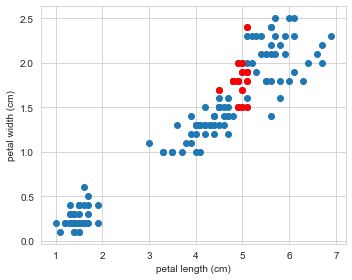

In [256]:
from sklearn.datasets import load_iris
iris_ds=load_iris()
X=iris_ds['data']
y=iris_ds['target']
print(X[34])
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,max_iter=1000)
km.fit(X)
km_prediction=km.predict(X)
print(km.labels_)
print(classification_report(y,km_prediction))
print(accuracy_score(y,km_prediction))
#import matplotlib.pyplot as plt
index1 = 0
misclassifiedIndexes = []
for label, predict in zip(y,km_prediction):
    if label != predict: 
        print(label,predict)
        misclassifiedIndexes.append(index1)
    index1 +=1
arrX=[]
arrY=[]
print(misclassifiedIndexes)
for i in misclassifiedIndexes:
    arr1=X[i].tolist()
    arrX.append(arr1)
arrX_in2=column(arrX,2)
arrX_in3=column(arrX,3)
print(arrX_in2)
x_index = 2
y_index = 3
# this formatter will label the colorbar with the correct target names
#formatter = plt.FuncFormatter(lambda i, *args: iris_ds.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris_ds.data[:, x_index], iris_ds.data[:, y_index])#, c=iris_ds.target)
#plt.colorbar(ticks=[0, 1, 2])#, format=formatter)
plt.scatter(arrX_in2,arrX_in3,color='red')
plt.xlabel(iris_ds.feature_names[x_index])
plt.ylabel(iris_ds.feature_names[y_index])

plt.tight_layout()
plt.show()

In [265]:
iris_ds1=load_iris()
X1=iris_ds['data']
y1=iris_ds['target']
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
km1=KMeans(n_clusters=3,max_iter=1000)
print(y_test1.size)
km1.fit(x_train1)
km_prediction1=km.predict(x_test1)
index1 = 0
misclassifiedIndexes1 = []
for label, predict in zip(y_test1,km_prediction1):
    if label != predict: 
        print(label,predict)
        misclassifiedIndexes1.append(index1)
    index1 +=1

print(km_prediction1.size)
print(classification_report(y_test1,km_prediction1))
print(accuracy_score(y_test1,km_prediction1))

30
2 1
30
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

0.9666666666666667
